# Récupération des données de la NASA

## Configuration

In [ ]:
#!pip install h5py

In [ ]:
#pip install dask

In [ ]:
#pip install xarray h5netcdf h5py netcdf4


In [ ]:
#pip install geopandas

In [ ]:
#pip install rasterio

In [ ]:
#!pip install cartopy

In [ ]:
"""
#Structure du projet
import os
import shutil

# 1. Définition de la structure cible
structure = [
    "data/raw",
    "data/interim",
    "data/processed",
    "geo",
    "notebooks",
    "models/baselines",
    "models/advanced",
    "configs",
    "src/data_prep",
    "src/features",
    "src/models",
    "src/evaluation",
    "reports/eda",
    "reports/evaluation"
]

# Racine du projet (on suppose qu'on est dans 'notebooks' ou à la racine)
# On remonte jusqu'à trouver le dossier .git ou on utilise le dossier courant
current_dir = os.getcwd()
if "notebooks" in current_dir:
    project_root = os.path.abspath(os.path.join(current_dir, ".."))
else:
    project_root = current_dir

print(f"Racine du projet identifiée : {project_root}")

# 2. Création des dossiers
for folder in structure:
    path = os.path.join(project_root, folder)
    os.makedirs(path, exist_ok=True)
    # Création des __init__.py pour que src soit importable
    if folder.startswith("src"):
        init_file = os.path.join(path, "__init__.py")
        if not os.path.exists(init_file):
            with open(init_file, 'w') as f:
                pass

print("Structure de dossiers créée.")

# 3. Déplacement des Données (Si elles sont dans notebooks/data)
# Cas spécifique : tes données FLDAS semblent être dans notebooks/data
old_data_path = os.path.join(project_root, "notebooks", "data")
new_data_path = os.path.join(project_root, "data")

if os.path.exists(old_data_path):
    print(f"Déplacement des données de {old_data_path} vers {new_data_path}...")
    # On déplace le contenu
    for item in os.listdir(old_data_path):
        s = os.path.join(old_data_path, item)
        d = os.path.join(new_data_path, item)
        if os.path.exists(s):
            # Si c'est raw (FLDAS), on met dans raw
            if "FLDAS" in item or "IPC" in item or "WFP" in item:
                target = os.path.join(new_data_path, "raw", item)
            else:
                target = d # Par défaut à la racine de data
            
            if not os.path.exists(target):
                shutil.move(s, target)
                print(f" -> {item} déplacé.")
            else:
                print(f" -> {item} existe déjà dans la destination.")
    
    # Nettoyage du dossier vide
    try:
        os.rmdir(old_data_path)
    except:
        pass

# 4. Déplacement des Fichiers Geo (GADM)
# On cherche gadm41_NGA_2.json un peu partout
potential_geo_files = ["gadm41_NGA_2.json", "livelihood_zones.geojson"]
for root, dirs, files in os.walk(project_root):
    # On évite le dossier geo cible pour ne pas boucler
    if "geo" in root and root == os.path.join(project_root, "geo"):
        continue
        
    for file in files:
        if file in potential_geo_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(project_root, "geo", file)
            if not os.path.exists(dst_file):
                shutil.move(src_file, dst_file)
                print(f"Geo file déplacé : {file} -> geo/")

print("Réorganisation terminée.")"""

Racine du projet identifiée : c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-
Structure de dossiers créée.
Déplacement des données de c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-\notebooks\data vers c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-\data...
Réorganisation terminée.


In [ ]:
"""
import os
import shutil

# 1. Définition des chemins relatifs (depuis le notebook)
source_folder = "./data"          # Le dossier data "en trop" dans notebooks
target_folder = "../data"         # Le "vrai" dossier data à la racine du projet

# 2. Vérification
if not os.path.exists(source_folder):
    print(f"✅ Le dossier {source_folder} n'existe plus. Tout est bon !")
else:
    print(f"🧹 Nettoyage du dossier {source_folder}...")
    
    # On s'assure que le dossier cible existe
    os.makedirs(target_folder, exist_ok=True)

    # 3. Déplacement élément par élément
    items = os.listdir(source_folder)
    for item in items:
        src_path = os.path.join(source_folder, item)
        dst_path = os.path.join(target_folder, item)
        
        print(f"Traitement de : {item}")
        
        # Si c'est un dossier (ex: raw, FLDAS...)
        if os.path.isdir(src_path):
            # Cas A : Le dossier n'existe pas dans la cible -> On déplace tout
            if not os.path.exists(dst_path):
                shutil.move(src_path, dst_path)
                print(f"   -> Dossier déplacé vers {dst_path}")
            # Cas B : Le dossier existe déjà -> On doit fusionner le contenu
            else:
                print(f"   -> Le dossier existe déjà dans {target_folder}, fusion du contenu...")
                for sub_item in os.listdir(src_path):
                    sub_src = os.path.join(src_path, sub_item)
                    sub_dst = os.path.join(dst_path, sub_item)
                    if not os.path.exists(sub_dst):
                        shutil.move(sub_src, sub_dst)
                        print(f"      -> {sub_item} déplacé.")
                    else:
                        print(f"      ⚠️ {sub_item} existe déjà, ignoré.")
                # Une fois vide, on supprime le dossier source
                try:
                    os.rmdir(src_path)
                    print(f"   -> Dossier vide {src_path} supprimé.")
                except OSError:
                    print(f"   ⚠️ Impossible de supprimer {src_path}, il n'est pas vide.")

        # Si c'est un fichier
        else:
            if not os.path.exists(dst_path):
                shutil.move(src_path, dst_path)
                print(f"   -> Fichier déplacé.")
            else:
                print(f"   ⚠️ Fichier déjà présent dans la destination, ignoré.")

    # 4. Suppression finale du dossier 'notebooks/data' s'il est vide
    try:
        os.rmdir(source_folder)
        print(f"\n✅ Dossier 'notebooks/data' supprimé avec succès.")
    except OSError:
        print(f"\n⚠️ Le dossier 'notebooks/data' n'a pas pu être supprimé (il contient encore des fichiers ?).")

    print("\n--- Vérification ---")
    print(f"Contenu de ../data : {os.listdir(target_folder)}")"""

🧹 Nettoyage du dossier ./data...

⚠️ Le dossier 'notebooks/data' n'a pas pu être supprimé (il contient encore des fichiers ?).

--- Vérification ---
Contenu de ../data : ['embeddings', 'interim', 'processed', 'raw']


In [9]:
import sys
import os

# Détection automatique de la racine du projet
# On remonte d'un niveau depuis le dossier 'notebooks'
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout au path pour pouvoir faire "from src..."
if project_root not in sys.path:
    sys.path.append(project_root)

# Définition des chemins absolus
DATA_RAW = os.path.join(project_root, "data", "raw")
DATA_PROCESSED = os.path.join(project_root, "data", "processed")
GEO_PATH = os.path.join(project_root, "geo")

print(f"Système configuré. Racine : {project_root}")

Système configuré. Racine : c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-


In [3]:
import sys
import os
import pandas as pd
import xarray as xr

# ==============================================================================
# 1. CONFIGURATION DES CHEMINS
# ==============================================================================
# On remonte d'un niveau pour trouver la racine du projet
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# Ajout de 'src' au path pour les imports
if project_root not in sys.path:
    sys.path.append(project_root)

# Définition de la base data
DATA_DIR = os.path.join(project_root, "data")

# --- CORRECTION ICI ---
# Le chemin est maintenant : projet/data/raw/FLDAS_raw
RAW_FLDAS = os.path.join(DATA_DIR, "raw", "FLDAS_raw")
PROCESSED_DIR = os.path.join(DATA_DIR, "processed")

print(f"✅ Racine du projet : {project_root}")
print(f"📂 Dossier FLDAS visé : {RAW_FLDAS}")

# ==============================================================================
# 2. TEST DE CHARGEMENT
# ==============================================================================
if os.path.exists(RAW_FLDAS):
    # On vérifie le contenu
    files = [f for f in os.listdir(RAW_FLDAS) if f.endswith('.nc')]
    if len(files) > 0:
        print(f"✅ Succès ! {len(files)} fichiers NetCDF trouvés.")
    else:
        print(f"⚠️ Le dossier existe mais est vide ! ({RAW_FLDAS})")
else:
    print(f"❌ Erreur : Le dossier est toujours introuvable à : {RAW_FLDAS}")

✅ Racine du projet : c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-
📂 Dossier FLDAS visé : c:\Users\valen\OneDrive\Documents\GitHub\Projet-de-Statapp---WFP-\data\raw\FLDAS_raw
✅ Succès ! 71 fichiers NetCDF trouvés.


## Chargement des bounding boxes

In [10]:
# ==========================
# 1. Imports et SSL
# ==========================
import ssl
import os
import sys
import warnings
import pandas as pd
import xarray as xr
import earthaccess
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

warnings.filterwarnings('ignore')
%matplotlib inline

# On récupère le chemin absolu du dossier parent (la racine du projet)
project_root = os.path.abspath("..")

# S'il n'est pas déjà dans les chemins connus, on l'ajoute
if project_root not in sys.path:
    sys.path.append(project_root)

# Maintenant Python peut "voir" le dossier src/
from src.data_prep.country_bbox import country_bounding_boxes# Vérifie si c'est COUNTRY_BBOX ou country_bounding_boxes


# 1. Authentification Automatique (via les identifiants)
os.environ['EARTHDATA_USERNAME'] = 'tnourlyn'
os.environ['EARTHDATA_PASSWORD'] = 'Lutinette2411%'

try:
    # strategy="environment" lit automatiquement les variables définies ci-dessus
    auth = earthaccess.login(strategy="environment")
    print("Authentification réussie !")
except Exception as e:
    print(f"Échec de login : {e}")

# 2. Récupération des coordonnées du Nigéria
# Le format dans le fichier est : 'CODE': ('Nom', (min_lon, min_lat, max_lon, max_lat))
bbox_nigeria = country_bounding_boxes['NG'][1]
min_lon, min_lat, max_lon, max_lat = bbox_nigeria

print(f"Zone d'étude définie : Nigéria {bbox_nigeria}")


Authentification réussie !
Zone d'étude définie : Nigéria (2.69170169436, 4.24059418377, 14.5771777686, 13.8659239771)


In [11]:
import earthaccess
import os

# ---------------------------------------------------
# Chargement des données 
# ---------------------------------------------------

# CORRECTION IMPORTANTE :
# On utilise le chemin universel défini plus haut (../data/raw/FLDAS_raw)
# Si tu n'as pas la variable RAW_FLDAS, remplace par : "../data/raw/FLDAS_raw"
data_dir = "../data/raw/FLDAS_raw"
os.makedirs(data_dir, exist_ok=True)

print(f" Les données seront stockées dans : {data_dir}")

# 0. Authentification (Indispensable pour earthaccess)
#earthaccess.login(strategy="interactive") # Ou "interactive" si tu n'as pas configuré tes fichiers

# 1. Recherche des données (2020-2025)
print("Recherche des granules FLDAS...")
granules = earthaccess.search_data(
    short_name='FLDAS_NOAH01_C_GL_M',
    temporal=("2020-01", "2025-12"),
    bounding_box=bbox_nigeria # Assure-toi que cette variable est bien chargée !
)

print(f"--> {len(granules)} fichiers trouvés.")

# 2. Téléchargement
# earthaccess est intelligent : il ne télécharge pas si le fichier existe déjà.
print("⬇ Démarrage du téléchargement...")
downloaded_files = earthaccess.download(granules, data_dir)
print("✅ Téléchargement terminé.")

 Les données seront stockées dans : ../data/raw/FLDAS_raw
Recherche des granules FLDAS...
--> 72 fichiers trouvés.
⬇ Démarrage du téléchargement...


QUEUEING TASKS | :   0%|          | 0/72 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/72 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/72 [00:00<?, ?it/s]

✅ Téléchargement terminé.


In [12]:
import earthaccess

# 1. Connexion (Anonyme ou avec tes identifiants si déjà loguée)
auth = earthaccess.login()

# 2. Recherche du DERNIER fichier disponible (Granule)
# short_name="FLDAS_NOAH01_C_GL_M" correspond au FLDAS Mensuel
print("Recherche de la dernière donnée disponible sur les serveurs NASA...")

granules = earthaccess.search_data(
    short_name="FLDAS_NOAH01_C_GL_M",
    count=1,                  # On en veut juste un
    sort_key="-start_date"    # Le "-" signifie "décroissant" (du plus récent au plus vieux)
)

# 3. Affichage du résultat
if granules:
    latest_file = granules[0]
    # On récupère la date de début du fichier (ex: 2024-12-01)
    latest_date = latest_file["umm"]["TemporalExtent"]["RangeDateTime"]["BeginningDateTime"]
    
    print(f"\nLa donnée la plus récente disponible est pour : {latest_date}")
    print(f"Nom du fichier : {latest_file['meta']['native-id']}")
else:
    print("Aucun fichier trouvé. Vérifie le short_name ou la connexion.")

Recherche de la dernière donnée disponible sur les serveurs NASA...

La donnée la plus récente disponible est pour : 2025-12-01T00:00:00.000Z
Nom du fichier : FLDAS_NOAH01_C_GL_M.001:FLDAS_NOAH01_C_GL_M.A202512.001.nc


## Création du DF

In [13]:
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import json

# ==============================================================================
# CONFIGURATION
# ==============================================================================
filename = "FLDAS_Nigeria_Admin2_Aggregated.csv"
pixel_parquet_path = os.path.join(PROCESSED_DIR, "fldas_pixels_raw.parquet")
vars_to_drop = ['SnowCover_inst', 'SnowDepth_inst', 'Snowf_tavg', 'SWE_inst', 'Qsb_tavg']

# 🚨 COMMANDE DE FORCE : On oblige le code à ignorer les anciens fichiers
# Mettre à True car tu viens de télécharger des nouvelles données
FORCE_UPDATE = True 

# ==============================================================================
# 2. LOGIQUE EN CASCADE
# ==============================================================================

final_csv_path = None

# On ne cherche le fichier existant QUE si on ne force pas la mise à jour
if not FORCE_UPDATE:
    potential_paths = [
        filename,
        os.path.join(PROCESSED_DIR, filename),
        os.path.join(DATA_DIR, "raw", filename),
        os.path.join(project_root, filename)
    ]
    for path in potential_paths:
        if os.path.exists(path):
            final_csv_path = path
            break

# CAS 1 : On garde l'ancien (Seulement si FORCE_UPDATE = False)
if final_csv_path:
    print(f"✅ Fichier existant retrouvé : {final_csv_path}")
    print("Chargement rapide...")
    df_final = pd.read_csv(final_csv_path)
    if 'time' in df_final.columns:
        df_final['time'] = pd.to_datetime(df_final['time'])
    print(f"Prêt ! Dimensions : {df_final.shape}")

# CAS 2 : On recalcule tout (Si FORCE_UPDATE = True ou fichier introuvable)
else:
    if FORCE_UPDATE:
        print("🔄 MISE À JOUR FORCÉE : On ignore les anciens CSV pour intégrer 2025.")
    else:
        print(f"⚠️ Fichier {filename} introuvable.")
    
    print("⏳ Démarrage du traitement complet...")

    # ÉTAPE A : Cache pixels
    # ATTENTION : Si on force l'update, on doit AUSSI ignorer le cache parquet
    if os.path.exists(pixel_parquet_path) and not FORCE_UPDATE:
        print(f"   -> Chargement des pixels depuis le cache ({pixel_parquet_path})...")
        df_pixels = pd.read_parquet(pixel_parquet_path)
    
    # ÉTAPE B : Lecture des NetCDF (C'est ici qu'on lit tes nouveaux fichiers !)
    else:
        print("   -> Lecture des fichiers NetCDF bruts (y compris 2025)...")
        # On s'assure de lire dans le bon dossier RAW
        raw_path_pattern = os.path.join(data_dir, "*.nc") # data_dir vient de ta cellule précédente
        
        try:
            ds = xr.open_mfdataset(raw_path_pattern, engine="h5netcdf", chunks={"time": -1})
        except OSError:
            # Fallback si h5netcdf n'est pas installé ou bug
            ds = xr.open_mfdataset(raw_path_pattern, chunks={"time": -1})

        min_lon, min_lat, max_lon, max_lat = bbox_nigeria
        ds_nigeria = ds.sel(X=slice(min_lon, max_lon), Y=slice(min_lat, max_lat))
        
        # Filtrage des variables
        vars_to_keep = [v for v in list(ds_nigeria.data_vars) if v not in vars_to_drop]
        
        print("   -> Conversion NetCDF vers Tableau (patience)...")
        df_pixels = ds_nigeria[vars_to_keep].load().to_dataframe().reset_index()
        df_pixels = df_pixels.dropna(subset=['Rainf_f_tavg'])
        
        # On met à jour le cache pour la prochaine fois
        df_pixels.to_parquet(pixel_parquet_path, index=False)
        print("   -> Cache mis à jour.")

    # ÉTAPE C : Agrégation Spatiale (LGA)
    print("   -> Agrégation spatiale (Mapping Admin2)...")
    
    # Chargement du GeoJSON
    path_geo = "../geo/gadm41_NGA_2.json"
    # Gestion de secours pour le chemin
    if not os.path.exists(path_geo):
        path_geo = "gadm41_NGA_2.json"

    with open(path_geo, "r", encoding="utf-8") as f:
        gdf_admin = gpd.GeoDataFrame.from_features(json.load(f)["features"])
        gdf_admin.set_crs("EPSG:4326", inplace=True)
    
    unique_pixels = df_pixels[['X', 'Y']].drop_duplicates()
    gdf_points = gpd.GeoDataFrame(unique_pixels, geometry=gpd.points_from_xy(unique_pixels.X, unique_pixels.Y), crs="EPSG:4326")
    
    # Jointure spatiale
    mapping = gpd.sjoin(gdf_points, gdf_admin[['NAME_1', 'NAME_2', 'geometry']], predicate="within")[['X', 'Y', 'NAME_1', 'NAME_2']]
    
    df_merged = df_pixels.merge(mapping, on=['X', 'Y'], how='inner')
    df_final = df_merged.groupby(['time', 'NAME_1', 'NAME_2']).mean(numeric_only=True).reset_index()
    
    # Sauvegarde
    save_path = os.path.join(PROCESSED_DIR, filename)
    df_final.to_csv(save_path, index=False)
    
    if 'time' in df_final.columns:
        df_final['time'] = pd.to_datetime(df_final['time'])
        
    print(f"✅ SUCCÈS : Nouveau fichier généré avec {df_final['time'].max()} !")
    display(df_final.tail(3)) # On affiche la FIN pour vérifier qu'on a bien 2025

🔄 MISE À JOUR FORCÉE : On ignore les anciens CSV pour intégrer 2025.
⏳ Démarrage du traitement complet...
   -> Lecture des fichiers NetCDF bruts (y compris 2025)...
   -> Conversion NetCDF vers Tableau (patience)...
   -> Cache mis à jour.
   -> Agrégation spatiale (Mapping Admin2)...
✅ SUCCÈS : Nouveau fichier généré avec 2025-12-01 00:00:00 !


,time,NAME_1,NAME_2,bnds,Y,X,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,...,Tair_f_tavg,Wind_f_tavg,SoilMoi00_10cm_tavg,SoilMoi10_40cm_tavg,SoilMoi40_100cm_tavg,SoilMoi100_200cm_tavg,SoilTemp00_10cm_tavg,SoilTemp10_40cm_tavg,SoilTemp40_100cm_tavg,SoilTemp100_200cm_tavg
52341,2025-12-01,Zamfara,Talata-Mafara,0.5,12.378571,6.107143,0.000010,336.682190,-118.063766,96896.062500,...,299.804688,6.874972,0.149997,0.334704,0.342975,0.368944,300.418365,300.309662,300.230011,300.187469
52342,2025-12-01,Zamfara,Tsafe,0.5,11.937500,6.906250,0.000011,331.739380,-117.862244,94940.343750,...,299.052216,6.916286,0.150628,0.287636,0.305387,0.369226,299.588745,299.469513,299.374268,299.292114
52343,2025-12-01,Zamfara,Zurmi,0.5,12.842000,6.786000,0.000008,329.693604,-119.098526,96304.539062,...,299.069611,6.835705,0.149330,0.328981,0.337463,0.364467,299.496002,299.545959,299.631653,299.794495


In [8]:
import os

# Chemin vers le fichier corrompu (identifié dans ton erreur)
# J'utilise le chemin relatif standard, adapte si besoin
bad_file = os.path.join("..", "data", "raw", "FLDAS_raw", "FLDAS_NOAH01_C_GL_M.A202511.001.nc")

if os.path.exists(bad_file):
    try:
        os.remove(bad_file)
        print(f"🗑️ Fichier corrompu supprimé : {bad_file}")
        print("Tu peux relancer le téléchargement maintenant.")
    except PermissionError:
        print("🔒 Impossible de supprimer le fichier car il est utilisé.")
        print("👉 RESTART TON KERNEL (Kernel -> Restart) et réessaie cette cellule.")
else:
    print(f"Le fichier n'existe pas (ou a déjà été supprimé) : {bad_file}")

🗑️ Fichier corrompu supprimé : ..\data\raw\FLDAS_raw\FLDAS_NOAH01_C_GL_M.A202511.001.nc
Tu peux relancer le téléchargement maintenant.


## Visualisation

In [14]:
import geopandas as gpd
import json
import os

# On vérifie si la variable 'gdf_admin' existe déjà en mémoire
if 'gdf_admin' not in locals():
    print(" Variable 'gdf_admin' manquante. Chargement des frontières...")

    # On cherche le fichier JSON un peu partout
    geo_filename = "gadm41_NGA_2.json"
    potential_paths = [
        f"../geo/{geo_filename}",  # Le bon endroit (structure propre)
        f"./{geo_filename}",       # À côté du notebook
        geo_filename               # Juste le nom
    ]

    found_path = None
    for p in potential_paths:
        if os.path.exists(p):
            found_path = p
            break

    if found_path:
        # Chargement manuel (plus robuste)
        with open(found_path, "r", encoding="utf-8") as f:
            data_json = json.load(f)
        
        gdf_admin = gpd.GeoDataFrame.from_features(data_json["features"])
        gdf_admin.set_crs("EPSG:4326", inplace=True)
        print(f"✅ Frontières chargées depuis : {found_path}")
    else:
        print(f"❌ Impossible de trouver {geo_filename}. Vérifie qu'il est bien dans le dossier 'geo' ou à côté.")
else:
    print("✅ Les frontières (gdf_admin) sont déjà chargées.")

✅ Les frontières (gdf_admin) sont déjà chargées.


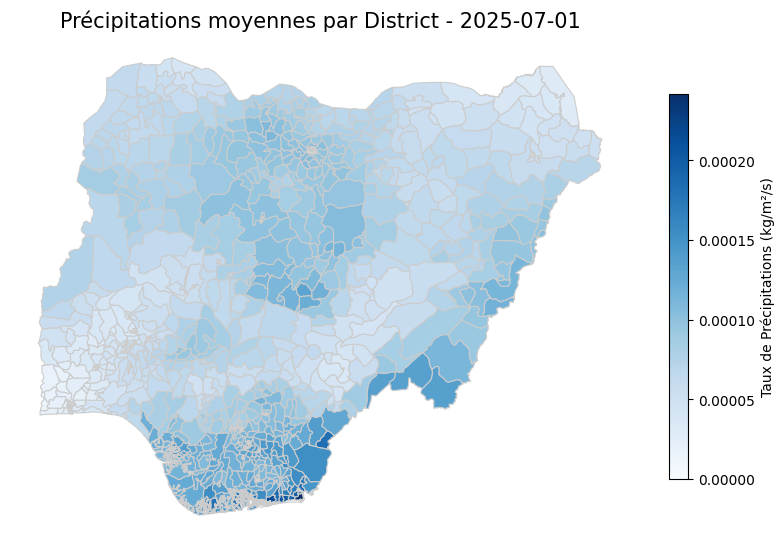

In [16]:
# ---------------------------------------------------------
# Visualisation Rapide
# ---------------------------------------------------------
import matplotlib.pyplot as plt

# 1. Choisir une date à visualiser
# Regardons quelles dates sont disponibles
# print(df_final['time'].unique()) 
target_date = "2025-07-01"  

# 2. Filtrer les données pour cette date
df_view = df_final[df_final['time'] == target_date]

if df_view.empty:
    print(f"⚠️ Pas de données pour la date {target_date}. Vérifiez le format.")
else:
    # 3. Jointure : On remet les formes (gdf_admin) sur les données
    # On utilise gdf_admin qu'on a chargé "à la main" dans la Cellule 4
    gdf_plot = gdf_admin.merge(df_view, on=['NAME_1', 'NAME_2'], how='left')

    # 4. Création de la carte
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # On choisit la variable à afficher (ici 'Rainf_f_tavg' = Pluie)
    gdf_plot.plot(
        column='Rainf_f_tavg', 
        cmap='Blues',           # Palette de couleurs (Blues, Reds, Viridis, Plasma...)
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Taux de Précipitations (kg/m²/s)", 'shrink': 0.5},
        missing_kwds={'color': 'lightgrey'}, # Griser les zones sans données
        ax=ax
    )

    ax.set_title(f"Précipitations moyennes par District - {target_date}", fontsize=15)
    ax.set_axis_off() # Enlève les axes X/Y (Longitude/Latitude)
    plt.show()

# Création du .gitignore

In [17]:
import os

# 1. Définition des dossiers à ignorer (ceux qui polluent ton git status)
folders_to_ignore = [
    "notebooks/global_0.1_degree_representation/",
    "notebooks/global_0.1_degree_tiff_all/",
    "src/**/__pycache__/" # Pour nettoyer les caches Python
]

# 2. Chemin du .gitignore
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
gitignore_path = os.path.join(project_root, ".gitignore")

# 3. Ajout au fichier existant
with open(gitignore_path, "a") as f: # "a" pour append (ajouter à la fin)
    f.write("\n# --- AJOUTS SPECIFIQUES ---\n")
    for folder in folders_to_ignore:
        f.write(f"{folder}\n")

print(f"✅ .gitignore mis à jour ! Les dossiers lourds ne seront plus proposés par Git.")

✅ .gitignore mis à jour ! Les dossiers lourds ne seront plus proposés par Git.
